In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path_in_drive = '/content/drive/My Drive/Colab Notebooks/Advertising.csv'

try:
  df = pd.read_csv(file_path_in_drive, index_col = 0)
  print(f"Successfully loaded '{file_path_in_drive}' into a DataFrame.")
  print(df.head()) # Display the first few rows to verify
except FileNotFoundError:
  print(f"Error: File not found at '{file_path_in_drive}'. Please check the path.")
except Exception as e:
  print(f"An error occurred: {e}")

df.columns

Mounted at /content/drive
Successfully loaded '/content/drive/My Drive/Colab Notebooks/Advertising.csv' into a DataFrame.
      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [3]:
sel_program = 'radio'
X=df[[sel_program]]
Y=df['sales']
Y=np.array((Y-Y.mean())/Y.std())
#X = np.array((X-X.mean())/X.std())

X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [4]:
def initialize(dim):
    b=random.random()
    a=np.random.rand(dim)
    return b,a

In [5]:
def predict_Y(b,a,X):
    return b + np.dot(X,a)

In [6]:
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y)

In [7]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1

In [8]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    tolerance = 1e-06
    b,theta=initialize(X.shape[1])

    gd_iterations_df=pd.DataFrame(columns=['iteration','value_b', 'value_weight', 'cost'])
    result_idx=0
    prev_cost =0

    for iter_num in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        gd_iterations_df.loc[result_idx]=[iter_num,b, theta[0], this_cost]
        result_idx=result_idx+1
        if (np.abs(this_cost  - prev_cost )<= tolerance):
            break
        prev_cost = this_cost
    return gd_iterations_df,b,theta

gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=400)

print(gd_iterations_df)

     iteration   value_b  value_weight      cost
0          0.0  0.883037      0.654954  1.482955
1          1.0  0.865377      0.653387  1.450550
2          2.0  0.848069      0.651852  1.419429
3          3.0  0.831108      0.650347  1.389540
4          4.0  0.814485      0.648872  1.360834
..         ...       ...           ...       ...
255      255.0  0.005112      0.576690  0.664655
256      256.0  0.005010      0.576681  0.664654
257      257.0  0.004910      0.576672  0.664653
258      258.0  0.004812      0.576663  0.664652
259      259.0  0.004716      0.576654  0.664651

[260 rows x 4 columns]


<Axes: xlabel='value_weight', ylabel='cost'>

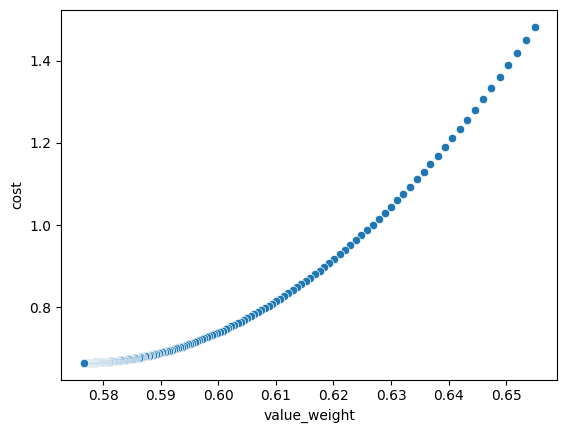

In [9]:
sns.scatterplot(data=gd_iterations_df, x="value_weight", y="cost")

In [10]:
idx = gd_iterations_df['cost'].argmin()
best_parameters = gd_iterations_df.loc[idx, ['value_b', 'value_weight']]
best_parameters['value_weight']


np.float64(0.5766542716614507)

In [11]:
x = df[sel_program]
y_ini = gd_iterations_df.loc[0, 'value_b'] + gd_iterations_df.loc[0, 'value_weight']*x
y_hat = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight']*x

In [12]:
import numpy as np

y_p = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight']*X
error = np.sum(np.abs(Y- y_p[sel_program]))/len(Y)
print(sel_program, error, get_cost(Y, y_p[sel_program]))

np.sum(((np.abs(Y- y_p[sel_program]))>0.5))


radio 0.6357507184309052 0.6646501287030496


np.int64(100)

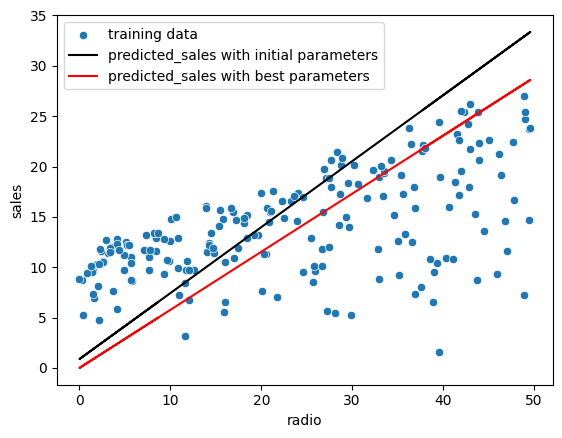

In [13]:
sns.scatterplot(data=df, x=sel_program, y="sales")
plt.plot( x,  y_ini, 'k', x, y_hat, 'r')
plt.legend(['training data', 'predicted_sales with initial parameters',
            'predicted_sales with best parameters'])
plt.show()